# Recap
First, we split the data into training and test.

In [1]:
import pandas as pd

df = pd.read_csv("https://dlsun.github.io/pods/data/bordeaux.csv",
                 index_col="year")
df

price  summer  har   sep  win  age
year                                    
1952   37.0    17.1  160  14.3  600   40
1953   63.0    16.7   80  17.3  690   39
1955   45.0    17.1  130  16.8  502   37
1957   22.0    16.1  110  16.2  420   35
1958   18.0    16.4  187  19.1  582   34
1959   66.0    17.5  187  18.7  485   33
1960   14.0    16.4  290  15.8  763   32
1961  100.0    17.3   38  20.4  830   31
1962   33.0    16.3   52  17.2  697   30
1963   17.0    15.7  155  16.2  608   29
1964   31.0    17.3   96  18.8  402   28
1965   11.0    15.4  267  14.8  602   27
1966   47.0    16.5   86  18.4  819   26
1967   19.0    16.2  118  16.5  714   25
1968   11.0    16.2  292  16.4  610   24
1969   12.0    16.5  244  16.6  575   23
1970   40.0    16.7   89  18.0  622   22
1971   27.0    16.8  112  16.9  551   21
1972   10.0    15.0  158  14.6  536   20
1973   16.0    17.1  123  17.9  376   19
1974   11.0    16.3  184  16.2  574   18
1975   30.0    16.9  171  17.2  572   17
1976   25.0    17.6  247  16.1  418   16
1977   11.0    15.6   87  16.8  821   15
1978   27.0    15.8   51  17.4  763   14
1979   21.0    16.2  122  17.3  717   13
1980   14.0    16.0   74  18.4  578   12
1981    NaN    17.0  111  18.0  535   11
1982    NaN    17.4  162  18.5  712   10
1983    NaN    17.4  119  17.9  845    9
1984    NaN    16.5  119  16.0  591    8
1985    NaN    16.8   38  18.9  744    7
1986    NaN    16.3  171  17.5  563    6
1987    NaN    17.0  115  18.9  452    5
1988    NaN    17.1   59  16.8  808    4
1989    NaN    18.6   82  18.4  443    3
1990    NaN    18.7   80  19.3  468    2
1991    NaN    17.7  183  20.4  570    1

In [12]:
import pandas as pd

df = pd.read_csv("https://dlsun.github.io/pods/data/bordeaux.csv",
                 index_col="year")
df_train = df.loc[:1980].copy()
df_test = df.loc[1981:].copy()

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=5, metric="euclidean"))
X_train = df_train[["win", "summer"]]
y_train = df_train["price"]

Next, we fit a 5-nearest neighbors model to the training data and use the model to predict the labels on the test data.

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline,
    X=X_train, y=y_train,
    scoring="neg_mean_squared_error",
    cv=4)
-scores.mean()

np.float64(375.27166666666665)

# Model Selection
What input features should we include?

1. winter rain, summer temp
2. winter rain, summer temp, harvest rain
3. winter rain, summer temp, harvest rain, Sept. temp

In [15]:
for features in [["win", "summer"],
                 ["win", "summer", "har"],
                 ["win", "summer", "har", "sep"]]:
  scores = cross_val_score(
      pipeline,
      X=df_train[features],
      y=df_train["price"],
      scoring="neg_mean_squared_error",
      cv=4)
  print(features, -scores.mean())

['win', 'summer'] 375.27166666666665
['win', 'summer', 'har'] 363.04047619047617
['win', 'summer', 'har', 'sep'] 402.4507142857142


# Hyperparameter Tuning
What is the best value of  k ?

In [16]:
X_train = df_train[["win", "summer", "har"]]

ks, test_mses = range(1, 7), []
for k in ks:
  pipeline = make_pipeline(
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=k, metric="euclidean"))
  scores = cross_val_score(
      pipeline, X_train, y_train,
      scoring="neg_mean_squared_error", cv=4)
  test_mses.append(-scores.mean())

Text(0, 0.5, 'Test MSE')

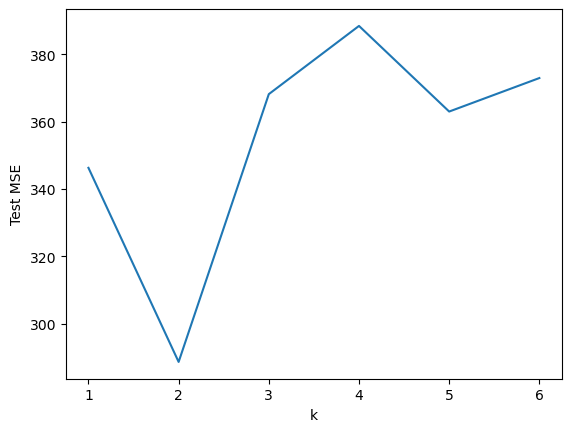

In [17]:
ax = pd.Series(test_mses, index=ks).plot.line()
ax.set_xlabel("k")
ax.set_ylabel("Test MSE")


# Grid Search
Scikit-Learn can make a grid of the possible parameter combinations, run cross-validation for each combination, and return the best parameter combination.

In [18]:
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=5, metric="manhattan"))

In [20]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(
    pipeline,
    param_grid={
        "kneighborsregressor__n_neighbors": range(1, 7),
         "kneighborsregressor__metric": ["euclidean", "manhattan"],
    },
    scoring="neg_mean_squared_error", cv=4)

grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'kneighborsregressor__metric': 'euclidean',
 'kneighborsregressor__n_neighbors': 2}


Where did the parameter names in param_grid come from?

In [10]:
#pipeline içindeki adımları ve her adımın hangi modele karşılık geldiğini gösteren bir listedir.
pipeline.steps 

[('standardscaler', StandardScaler()),
 ('kneighborsregressor', KNeighborsRegressor(metric='manhattan'))]